In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import datetime
import torchvision
from torchvision.datasets import MNIST
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                              #  nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.ReLU(), 
                               nn.Flatten(),    
                               nn.Linear(784, 400),
                              #  nn.Linear(196, 100),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # print(type(self.datasets.train_data))
  def forward(self, x):
    return nn.Softmax(dim=1)(self.model(x))

  def train(self, args, name):
    epochs = args['epochs']
    lr = args['lr']
    batch_size = args['batch_size']
    weight_decay = args['weight_decay']
    save_freq = args['save_freq']
    save_dir = os.path.join(args['save_dir'], name, str(datetime.datetime.now())[:-10])
    os.makedirs(save_dir)

    loss_list = []
    test_loss_list = []
    batch_loss_list = []

    train_dl = DataLoader(self.train_data, batch_size = batch_size)
    test_dl = DataLoader(self.test_data, batch_size = batch_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(self.model.parameters(), lr = lr, weight_decay = weight_decay)

    for i in range(epochs):
      epoch_loss = 0
      total = 0
      correct = 0
      for idx, data in enumerate(train_dl):
        inputs = data[0].to(self.device)
        targets = data[1].to(self.device)
        outputs = self.model(inputs)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted==targets).sum().item()
        total += targets.size(0)

        loss = loss_fn(outputs, targets)
        batch_loss_list.append(loss.item())
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      loss_list.append(epoch_loss)

      with torch.no_grad():
        test_total = 0
        test_correct = 0
        test_epoch_loss = 0
        for idx, data in enumerate(test_dl):
          inputs = data[0].to(self.device)
          targets = data[1].to(self.device)
          outputs = self.model(inputs)

          _, predicted = torch.max(outputs, 1)
          test_total += targets.size(0)
          test_correct  += (predicted == targets).sum().item()
          loss = loss_fn(outputs, targets)
          test_epoch_loss += loss.item()

        test_loss_list.append(test_epoch_loss)
        print(f'Epoch: {i+1}/{epochs}  |  Training Accuracy: {round(correct/total*100,2)},   Validation Accuracy: {round(test_correct/test_total*100,2)}')

        if (i+1)%save_freq == 0:
            model_path = os.path.join(save_dir, f'epoch_{i+1}.pth')
            torch.save(self.model.state_dict(), model_path)
            print('Saved model at: ', model_path)

      print('Finished Training')
      
    plt.figure()
    plt.plot(batch_loss_list)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.savefig(os.path.join(save_dir, 'loss_vs_iters.png'))
    
    plt.figure()
    plt.plot(loss_list, label='train')
    plt.plot(test_loss_list, label='val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'loss_vs_epochs.png'))





    

In [ ]:
# args = {"epochs":20, "lr":1e-4, "batch_size":100, "weight_decay":0.04, "save_freq":1, "save_dir": "/content/drive/MyDrive/CS726_project"}
args = {"epochs":20, "lr":1e-4, "batch_size":100, "weight_decay":0.04, "save_freq":1, "save_dir": "/content/drive/MyDrive/CS726 Project/CS726_project"}
model1 = Model1()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Epoch: 1/20  |  Training Accuracy: 57.92,   Validation Accuracy: 85.51
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_1.pth
Finished Training
Epoch: 2/20  |  Training Accuracy: 87.33,   Validation Accuracy: 88.39
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_2.pth
Finished Training
Epoch: 3/20  |  Training Accuracy: 88.86,   Validation Accuracy: 89.26
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_3.pth
Finished Training
Epoch: 4/20  |  Training Accuracy: 89.38,   Validation Accuracy: 89.75
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_4.pth
Finished Training
Epoch: 5/20  |  Training Accuracy: 89.61,   Validation Accuracy: 89.8
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_5.pth
Finished Training
Epoch: 6/20  |  Training A

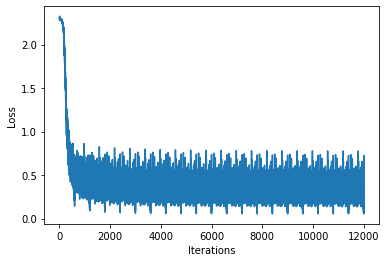

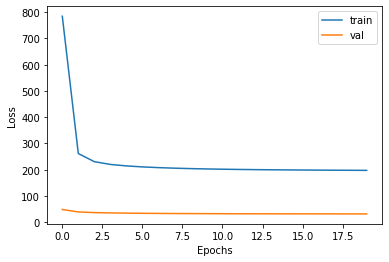

In [ ]:
model1.train(args, 'MNIST_ENSEMBLE_MODEL_1')

In [ ]:
class Model2(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 2, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(392, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



Epoch: 1/20  |  Training Accuracy: 15.57,   Validation Accuracy: 58.14
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_1.pth
Finished Training
Epoch: 2/20  |  Training Accuracy: 84.27,   Validation Accuracy: 89.13
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_2.pth
Finished Training
Epoch: 3/20  |  Training Accuracy: 89.03,   Validation Accuracy: 90.0
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_3.pth
Finished Training
Epoch: 4/20  |  Training Accuracy: 89.62,   Validation Accuracy: 90.37
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_4.pth
Finished Training
Epoch: 5/20  |  Training Accuracy: 89.94,   Validation Accuracy: 90.51
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_5.pth
Finished Training
Epoch: 6/20  |  Training A

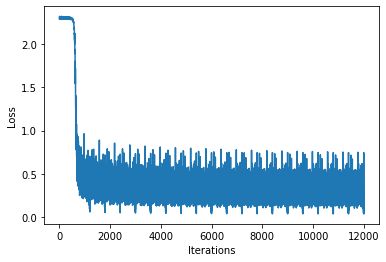

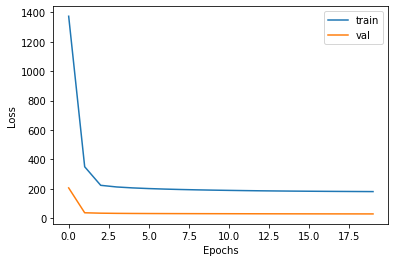

In [ ]:
model2 = Model2()
model2.train(args, 'MNIST_ENSEMBLE_MODEL_2')

In [ ]:
class Model3(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (3,3), stride = 1, padding = 'same'), #15x15x6
                              #  nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(784, 400),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



Epoch: 1/20  |  Training Accuracy: 50.4,   Validation Accuracy: 86.41
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_1.pth
Finished Training
Epoch: 2/20  |  Training Accuracy: 86.76,   Validation Accuracy: 89.02
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_2.pth
Finished Training
Epoch: 3/20  |  Training Accuracy: 88.17,   Validation Accuracy: 89.72
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_3.pth
Finished Training
Epoch: 4/20  |  Training Accuracy: 88.91,   Validation Accuracy: 90.2
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_4.pth
Finished Training
Epoch: 5/20  |  Training Accuracy: 89.57,   Validation Accuracy: 90.87
Saved model at:  /content/drive/MyDrive/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_5.pth
Finished Training
Epoch: 6/20  |  Training Ac

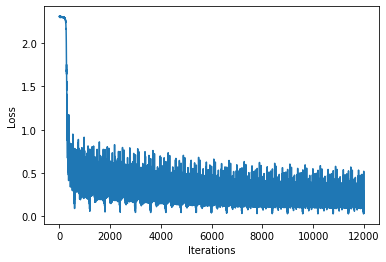

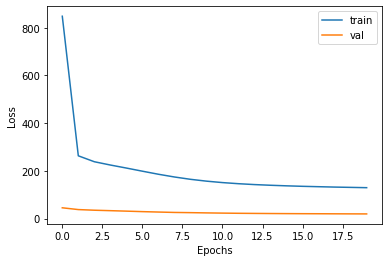

In [ ]:
model3 = Model3()
model3.train(args, 'MNIST_ENSEMBLE_MODEL_3')

In [ ]:
class Model4(Model1):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(1, 32, (3,3), stride = 1, padding = 'same'),    #28x28x32
                                nn.Conv2d(32, 64, (5,5), stride = 1, padding = 'same'),   #28x28x64
                                nn.ReLU(), 
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding='same'),     #28x28x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #14x14x64
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding = 'same'),   #14x14x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #7x7x64
                                nn.ReLU(), 
                                nn.Flatten(),                                             #3136
                                nn.Linear(3136, 400),
                                nn.Linear(400, 100),
                                nn.Linear(100, 10))
        self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        # self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    def forward(self, x):
        x = x.to(self.device)
        print(x.device)
        return nn.Softmax(dim=1)(self.model(x.to(self.device)))

Epoch: 1/20  |  Training Accuracy: 83.9,   Validation Accuracy: 95.2
Saved model at:  /content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_1.pth
Finished Training
Epoch: 2/20  |  Training Accuracy: 95.61,   Validation Accuracy: 96.13
Saved model at:  /content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_2.pth
Finished Training
Epoch: 3/20  |  Training Accuracy: 95.96,   Validation Accuracy: 96.3
Saved model at:  /content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_3.pth
Finished Training
Epoch: 4/20  |  Training Accuracy: 96.08,   Validation Accuracy: 96.39
Saved model at:  /content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_4.pth
Finished Training
Epoch: 5/20  |  Training Accuracy: 96.18,   Validation Accuracy: 96.4
Saved model at:  /content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-0

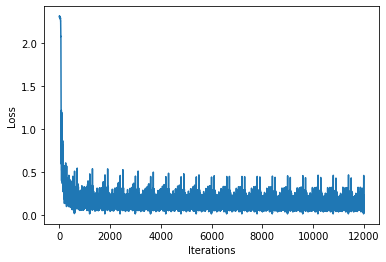

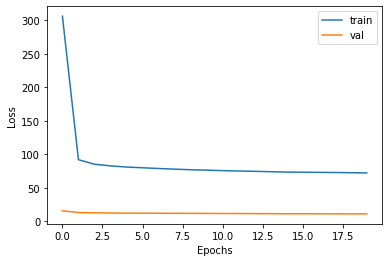

In [ ]:
model4 = Model4().to(device)
model4.train(args, 'MNIST_ENSEMBLE_MODEL_4')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

ImportError: ignored

In [8]:

from torchvision.datasets import MNIST
from torchvision.models import resnet50
resnet = resnet50(pretrained = True)
# print(train_dl)

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import seaborn as sns 
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [12]:
batch_size = 64
train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
train_dl = DataLoader(train_data, batch_size = batch_size, shuffle=False)

test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_dl = DataLoader(test_data, batch_size = batch_size, shuffle=False)


In [13]:
def change_layers(model):
    model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.fc = nn.Linear(2048, 10, bias=True)
    return model
change_layers(resnet)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
if(torch.cuda.is_available()):
    resnet = resnet.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

In [24]:
import time

print('Training....')
total = 0
correct = 0
start = time.time()
save_dir = "/content/drive/MyDrive/CS726_project/RESNET50"
save_dir = os.path.join(save_dir, "RESNET50", str(datetime.datetime.now())[:-10])
os.makedirs(save_dir)
for epoch in range(10):
    

    for i, data in enumerate(train_dl, 1):
        images, labels = data

        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()    
        outputs = resnet(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        if(i%100 == 0):
            print('Epoch: {} Batch: {} loss: {}'.format(epoch, i, loss.item()))

            model_path = os.path.join(save_dir, f'epoch_{i+1}.pth')
            torch.save(resnet.state_dict(), model_path)
            print('Saved model at: ', model_path)


print('Training Completed in: {} secs'.format(time.time()-start))
print('Training accuracy: {} %'.format((correct/total)*100))


Training....
Epoch: 0 Batch: 100 loss: 6.970619142521173e-05
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_101.pth
Epoch: 0 Batch: 200 loss: 5.1783448725473136e-05
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_201.pth
Epoch: 0 Batch: 300 loss: 7.647175516467541e-05
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_301.pth
Epoch: 0 Batch: 400 loss: 5.966989920125343e-05
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_401.pth
Epoch: 0 Batch: 500 loss: 5.415554187493399e-05
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_501.pth
Epoch: 0 Batch: 600 loss: 0.00018243759404867887
Saved model at:  /content/drive/MyDrive/CS726_project/RESNET50/RESNET50/2022-05-05 15:46/epoch_601.pth
Epoch: 0 Batch: 700 loss: 7.786432252032682e-05
Saved model at:  /content/drive

In [13]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models.mobilenet import mobilenet_v2
from torch.optim.lr_scheduler import StepLR
from torch.nn import CrossEntropyLoss
import pandas as pd

save_dir = "/content/drive/MyDrive/CS726_project"
save_dir = os.path.join(save_dir, "MOBILENET", str(datetime.datetime.now())[:-10])
os.makedirs(save_dir)
        

def train(model, device, train_loader, optimizer, epoch):
    log_interval = 10
    loss_func = CrossEntropyLoss()
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.repeat(1, 3, 1, 1)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            model_path = os.path.join(save_dir, f'epoch_{batch_idx+1}.pth')
            torch.save(model.state_dict(), model_path)
            print('Saved model at: ', model_path)
            torch.save(model.state_dict(), "mnist_cnn.pth")


def tst(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_func = CrossEntropyLoss()
    
    with torch.no_grad():
        for data, target in test_loader:
            data = data.repeat(1, 3, 1, 1)
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_func(output, target)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    batch_size = 64
    learning_rate = 1.0
    reduce_lr_gamma = 0.7
    epochs = 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print('Device: {} Epochs: {} Batch size: {}'.format(device, epochs, batch_size))

    kwargs = {'batch_size': batch_size}
    if torch.cuda.is_available():
        kwargs.update({'num_workers': 1, 'pin_memory': True})

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

    test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

    # dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
    # dataset2 = datasets.MNIST('../data', train=False, transform=transform)
    # print('Length train: {} Length test: {}'.format(len(dataset1), len(dataset2)))
    
    train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)
    print('Number of train batches: {} Number of test batches: {}'.format(len(train_loader), len(test_loader)))

    model = mobilenet_v2(pretrained=True)
    model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=10)
    model.to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)

    scheduler = StepLR(optimizer, step_size=1, gamma=reduce_lr_gamma)
    

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        # tst(model, device, test_loader)
        scheduler.step()
        
    # Final prediction
    # ids = list(range(len(dataset2)))
    # submission = pd.DataFrame(ids, columns=['id'])
    # predictions = []
    # real = []
    # for data, target in test_loader:
    #     data = data.repeat(1, 3, 1, 1)
    #     data = data.to(device)
    #     output = model(data)
    #     pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    #     predictions += list(pred.cpu().numpy()[:, 0])
    #     real += list(target.numpy())
    # submission['pred'] = predictions
    # submission['real'] = real
    # submission.to_csv('submission.csv', index=False)
    # print('Submission saved in: {}'.format('submission.csv'))


if __name__ == '__main__':
    main()

Device: cpu Epochs: 4 Batch size: 64
Number of train batches: 938 Number of test batches: 157
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.396605
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_1.pth
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.304929
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_11.pth
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.020709
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_21.pth
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.220893
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_31.pth
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.397380
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_41.pth
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.827546
Saved model at:  /content/drive/MyDrive/CS726_project/MOBILENET/2022-05-05 21:08/epoch_51.pth
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.338476
Saved model

In [17]:
model = mobilenet_v2(pretrained=True)
model.classifier[1] = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=10)
# model.to(device)
# optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)

# scheduler = StepLR(optimizer, step_size=1, gamma=reduce_lr_gamma)
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,